In [18]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
data  = pd.read_csv('/Users/siumbel/Downloads/Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
empty_cells = data.isnull().sum().sum()

In [6]:
print("Количество пустых ячеек:", empty_cells)

Количество пустых ячеек: 866


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
def clas_types(data_frame):  
    for feature in list(data_frame.columns):     
        if data_frame[feature].dtype == 'O':     
            data_frame[feature].replace(['Yes', 'No'], [1, 0], inplace=True)  
            for iteration, value in enumerate(list(data_frame[feature].unique())):  
                if type(value) == str:         
                    if data_frame[feature].nunique() > 2:  
                        iteration += 1                     
                    data_frame[feature].replace(value, iteration, inplace=True)  
df = data.copy()
clas_types(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22.0,1,0,1,7.2500,NaN,1.0
1,2,1,1,2,1,38.0,1,0,2,71.2833,2.0,2.0
2,3,1,3,3,1,26.0,0,0,3,7.9250,NaN,1.0
3,4,1,1,4,1,35.0,1,0,4,53.1000,3.0,1.0
4,5,0,3,5,0,35.0,0,0,5,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,887,0,27.0,0,0,678,13.0000,NaN,1.0
887,888,1,1,888,1,19.0,0,0,679,30.0000,147.0,1.0
888,889,0,3,889,1,NaN,1,2,615,23.4500,NaN,1.0
889,890,1,1,890,0,26.0,0,0,680,30.0000,148.0,2.0


In [11]:
df = df.fillna(df.median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,0,22.0,1,0,1,7.2500,65.0,1.0
1,2,1,1,2,1,38.0,1,0,2,71.2833,2.0,2.0
2,3,1,3,3,1,26.0,0,0,3,7.9250,65.0,1.0
3,4,1,1,4,1,35.0,1,0,4,53.1000,3.0,1.0
4,5,0,3,5,0,35.0,0,0,5,8.0500,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,887,0,27.0,0,0,678,13.0000,65.0,1.0
887,888,1,1,888,1,19.0,0,0,679,30.0000,147.0,1.0
888,889,0,3,889,1,28.0,1,2,615,23.4500,65.0,1.0
889,890,1,1,890,0,26.0,0,0,680,30.0000,148.0,2.0


In [12]:
for column in df.columns:
    unique_values = df[column].nunique()
    min_value = df[column].min()
    max_value = df[column].max()
    print("Признак:", column)
    print("Количество уникальных значений:", unique_values)
    print("Минимальное значение:", min_value)
    print("Максимальное значение:", max_value)
    print()

Признак: PassengerId
Количество уникальных значений: 891
Минимальное значение: 1
Максимальное значение: 891

Признак: Survived
Количество уникальных значений: 2
Минимальное значение: 0
Максимальное значение: 1

Признак: Pclass
Количество уникальных значений: 3
Минимальное значение: 1
Максимальное значение: 3

Признак: Name
Количество уникальных значений: 891
Минимальное значение: 1
Максимальное значение: 891

Признак: Sex
Количество уникальных значений: 2
Минимальное значение: 0
Максимальное значение: 1

Признак: Age
Количество уникальных значений: 88
Минимальное значение: 0.42
Максимальное значение: 80.0

Признак: SibSp
Количество уникальных значений: 7
Минимальное значение: 0
Максимальное значение: 8

Признак: Parch
Количество уникальных значений: 7
Минимальное значение: 0
Максимальное значение: 6

Признак: Ticket
Количество уникальных значений: 681
Минимальное значение: 1
Максимальное значение: 681

Признак: Fare
Количество уникальных значений: 248
Минимальное значение: 0.0
Максимал

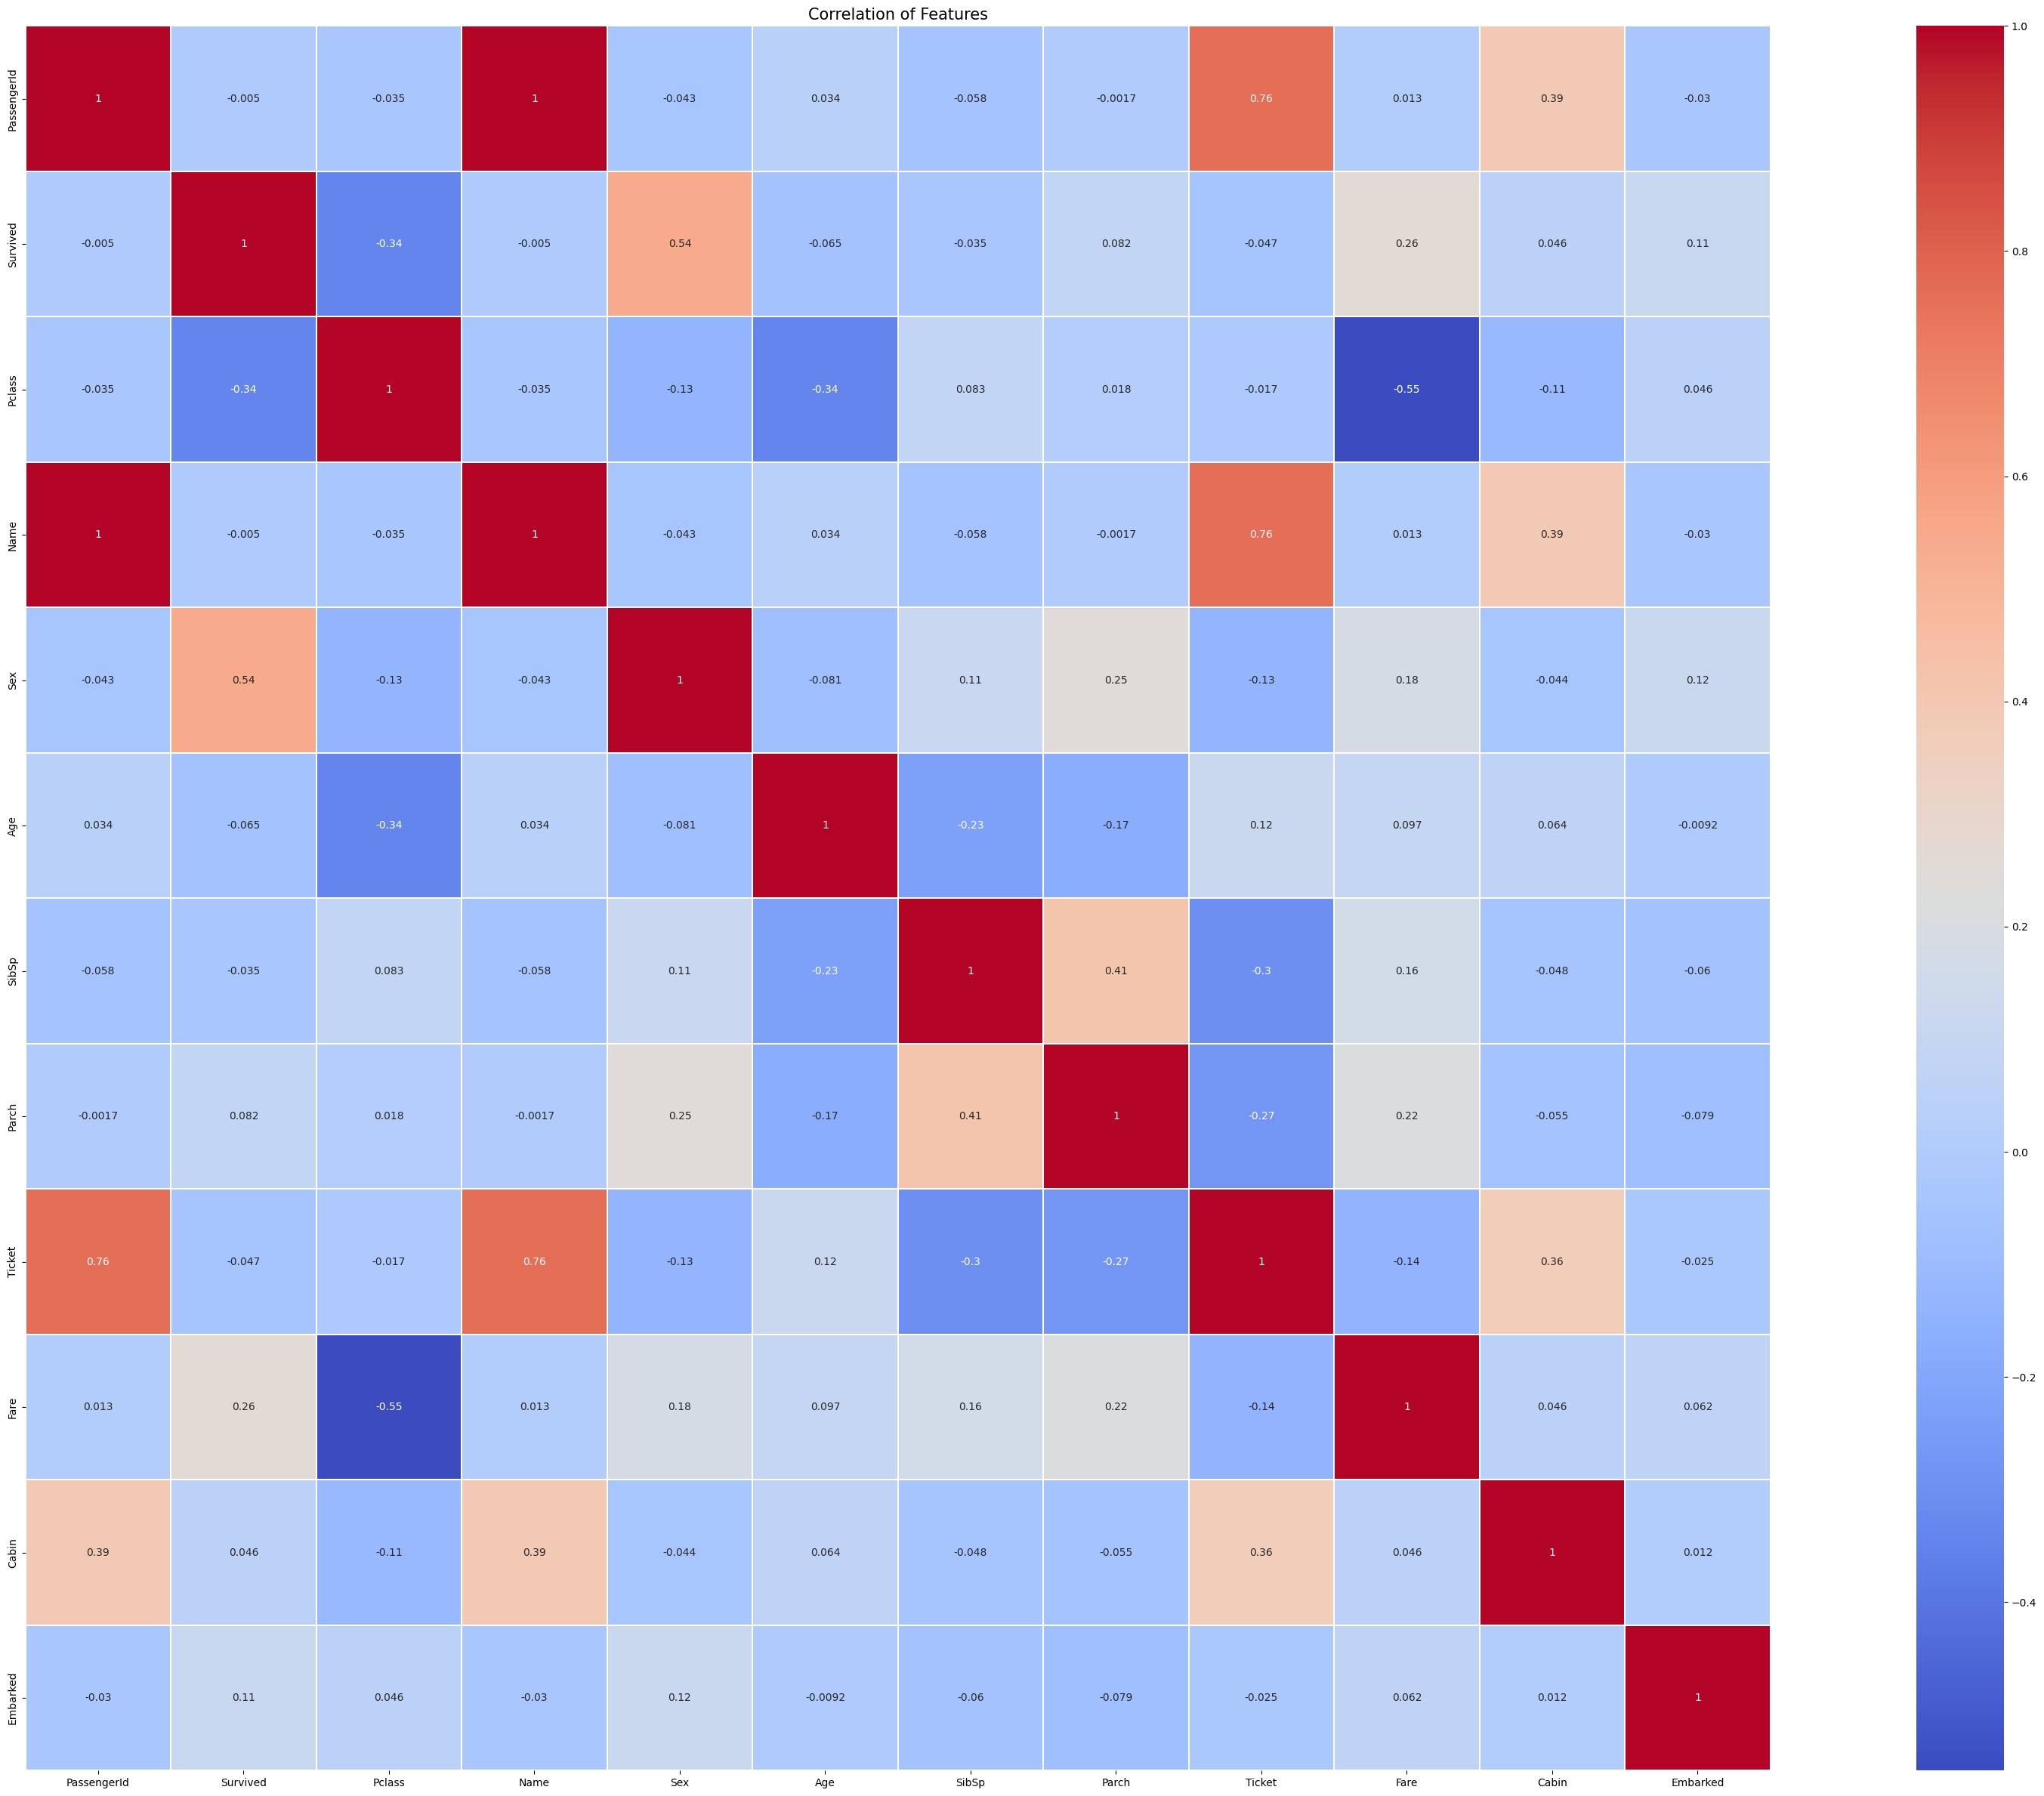

In [19]:
plt.figure(figsize=(50,30))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', cmap= 'coolwarm', annot=True, fmt='.2g')
plt.show()

Если применим в качестве инструмента анализа хитмап, то видим, что на выживаемость сильнее всего влияли ПОЛ и ЦЕНА БИЛЕТА (то есть выживали женщины и пассажиры с более дорогим билетом). Логично, что низкий коэффициент корреляции, а значитБ и взаимосвязь с такими фичами, как айди пассажира, количество путешествующих с ним, номер билета и прочие похожие показатели. А вот класс, которым путешествовали имеет, относительно неплохую отрицательную корреляцию, можно объяснить, что те, у кого он ниже выживали реже.

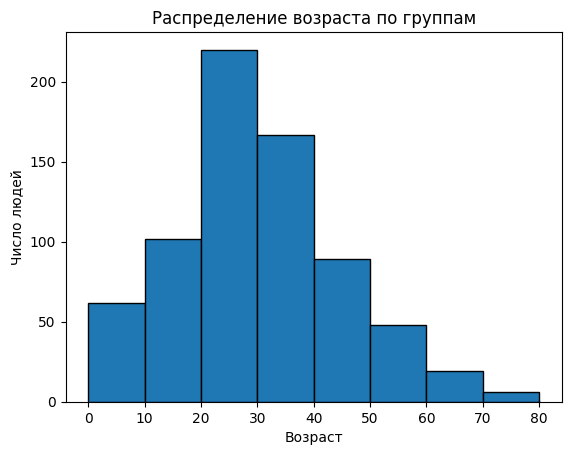

In [22]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.max(data["Age"])]

plt.hist(data["Age"], bins=bins, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Число людей')
plt.title('Распределение возраста по группам')
plt.show()